# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the Zelda BotW network, since it is built on the Zelda Wiki which contains pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

# Part 1: A little lecture

> **_Video Lecture_**. Today is all about ***working*** with NLTK, so not much lecturing - you can get my perspective and a little pep-talk

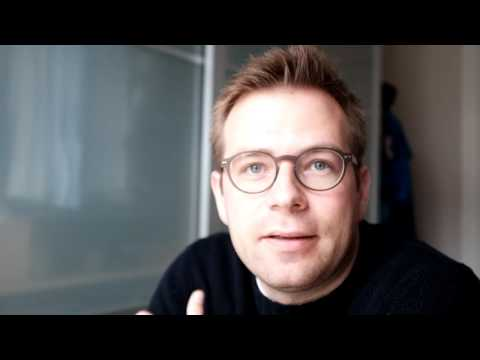

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)

# Part 2: Installing and the basics

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies (mine did 😱), you can direclty download the collection by typing `nltk.dwonload("book")` instead.

## 2.2 Introduction to NLTK

1. Now that you have nltk installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

In [2]:
import nltk
#nltk.download()

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [6]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [7]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

<Figure size 640x480 with 1 Axes>

In [8]:
#generates randoom text based on the given textt
text3.generate()

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

In [9]:
#token=sequence of characters which we treat as a group
len(text3)

44764

In [10]:
#unique words
len(set(text3))

2789

In [11]:
#lexical diversity
len(set(text3))/len(text3)

0.06230453042623537

In [12]:
text3.count("smote")

5

In [13]:
def lexical_diversity(text):
    return len(set(text)) / len(text) 

def percentage(count, total):
    return 100 * count / total

2. Now that you have gone through Chapter 1, let's try some of the nltk functionalities on our own Text!

> Setup. We want to start from a clean version of the ZeldaWiki pages of the characters. A version with as little wiki-markup as possible. We needed it earlier to get the links, gender, etc., but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the ZeldaWiki API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/ZeldaBotW_nodes_w_attributes_enriched.csv) of the characters with pandas `pd.read_csv()` and assign it to `df_characters`;
> * use the same code you have used to query the API before (remember the baseurl is `https://zelda.fandom.com/api.php?`), but change the parameter `content` in `content="prop=extracts&exlimit=1&explaintext"`;
> * loop through the `Name` column of df_characters and for each name make a request to the API
>     * **Note1** replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_CHARACTER_HERE)` to build your title;
>     * **Note2** take care of `Cherry` (remember the title of her page is different).
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note3** the key you are looking for is now `extract` not `*`


In [14]:
import pandas as pd
import numpy as np
import requests
from itertools import chain
import urllib
from pathlib import Path

In [15]:
import pandas as pd
df_characters = pd.read_csv("../files/ZeldaBotW_nodes_w_attributes_enriched.csv")
#df_characters.sort_values('Role', inplace=True)

In [16]:
df_characters.head()

,Name,Role,Race,Gender
0,Baddek,Ally,Hylian,Male
1,Bamboo,Ally,Horse,Unknown
2,Banji,Ally,Hylian,Female
3,Baumar,Ally,Hylian,Male
4,Bayge,Ally,Goron,Male


In [17]:
#own code
import requests
import os

base_url = "https://zelda.fandom.com/api.php"

def retrieve_query(title):
    payload = {
        'titles': [title],
        "prop":"extracts",
        "exlimit":"1",
        "explaintext": "",
        'format': 'json',
        'action': 'query',
        
    }

    r = requests.get(base_url, params=payload)
    req_json = r.json()
    #note 3: extract
    pages = [page for _, page in req_json['query']['pages'].items()]
    extracts = [p['extract'] for p in pages]
    content = "\n".join(extracts)
    return content

In [18]:
#own code
from pathlib import Path
directory = Path("final/")

for ch in df_characters['Name']:
    #Cherry case
    if ch == "Cherry":
         ch = "Ancient_Oven"
    #Note 2
    if " " in ch:
        ch = ch.replace(" ", "_")
        ch = urllib.parse.quote_plus(ch)
    query = retrieve_query(ch)
    os.makedirs(directory, exist_ok=True)

    if not os.path.exists(directory / f"{ch}.txt"):
        
        text_file = open(directory / f"{ch}.txt", "w")
        text_file.write(query)
        text_file.close()

KeyError: 'extract'

In [ ]:
#Artur's code
def get_web_content(title=None):
    if title == "Cherry":
        title = "Ancient_Oven"
    base_url = "https://zelda.fandom.com/api.php"
    payload = {
        'titles': [title],
        "prop":"extracts",
        "exlimit":"1",
        "explaintext": "",
        'format': 'json',
        'action': 'query',
    }

    r = requests.get(base_url, params=payload)
    req_json = r.json()
    pages = [page for _, page in req_json['query']['pages'].items()]
    extracts = [p['extract'] for p in pages]
    content = "\n".join(extracts)
    return content

In [ ]:
#Artur's code
dir_path = Path("week6_contents")
dir_path.mkdir(exist_ok=True)

for x in df_characters.itertuples():
    name = x[1]
    file_path = dir_path / f"{name}.txt"
    if file_path.exists():
        continue
    content = get_web_content(name)
    with open(file_path, 'w') as f:
        f.write(content)

>
> Use this method to retrive a nice copy of all BotW characters's text. Save each character's text in a txt file and collect them all in a new folder!

> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_characters`, e.g., Baddek.txt first, Bamboo.txt second etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the ZeldaWiki corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [ ]:
from nltk.corpus import PlaintextCorpusReader, CategorizedCorpusReader


In [ ]:
file_list = [str(x) + '.txt' for x in df_characters['Name']]
file_list

In [ ]:
#how is the file_list relevant to the path?
wordlists = PlaintextCorpusReader(str(dir_path), file_list)
text = nltk.Text(wordlists.words())

In [ ]:
text

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the ZeldaWiki Text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the ZeldaWiki text and a word of your own choosing.
> * Also try out the `similar` and `common_contexts` methods, again with any word/s you like.
> * Create the ZeldaWiki version of a dispersion plot:
>    1. try with the words `['attack','help']`. What do you observe? (**hint:** we ordered characters as they appear in df_characters)


In [ ]:
#concordance, similar, common_context
text.concordance("hero")


In [ ]:
print(text.similar("hero"))
print(text.common_contexts(['monstrous', 'very']))

In [ ]:
text.dispersion_plot(['attack','help'])

>    2. find the top 6 races of allies by counting how many characters of each race there are in `df_characters`. Save the list of races and use it to create a new dispersion plot. What do you observe? (**hint:** look at how allies were originally ordered in the [Zelda Wiki](https://zelda.fandom.com/wiki/Characters_in_Breath_of_the_Wild))


In [ ]:
pd_races = df_characters.groupby('Race').agg('count').sort_values(by='Role', ascending=False)[:6]['Name']
pd_races.index

In [ ]:
list_races = [x for x in pd_races.index]

In [ ]:
list_races

text.dispersion_plot(list_races)

>    3. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).




In [ ]:
text.dispersion_plot([x for x in df_characters.groupby('Race').agg('count').sort_values(by='Role', ascending=False)[7:10]['Name'].index])

> * What is a bigram? How does it relate to `collocations`. Explain in your own words.

Ie. A bigram or digram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. (ie. 'ng', 'tg', 'ab')

>    1. Compute the collocations on the ZeldaWiki Text.
> * Review the discussion of conditionals in Sec. 4. Find all words in the ZeldaWiki Text starting with the letter *b*. Show the first 5 in alphabetical order.
> * Use `.index()` to find the index of the word *Cherry*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.
> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the ZeldaWiki Text and print the 5 longest uppercase words, one per line.

> *Exercise 2*: Basic stats
>
> * How many tokens are there in the ZeldaWiki Text? How many distinct tokens are there?
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the ZeldaWiki Text;
>     2. Compute the lexical diversity related to allies and enemies (bosses inlcuded). Comment your results.
> * Create frequency distributions for the ZeldaWiki Text, including the cumulative frequency plot for the 75 most common tokens. 
> * Find all the four-letter tokens in the ZeldaWiki Text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.
> * What does the following code do? `sum(len(w) for w in ZeldaWiki)` Can you use it to work out the average token length of the ZeldaWiki Text?
> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the ZeldaWiki Text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the ZeldaWiki Text to compute the percentage for *Link* (our beloved hero)

# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the Zelda Wiki. But that's not the only source of text in the universe. In fact, it's far from it . Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](http://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>

> 4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [19]:
state_union = nltk.corpus.state_union
state_union.fileids()

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt',
 '1956-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1958-Eisenhower.txt',
 '1959-Eisenhower.txt',
 '1960-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1962-Kennedy.txt',
 '1963-Johnson.txt',
 '1963-Kennedy.txt',
 '1964-Johnson.txt',
 '1965-Johnson-1.txt',
 '1965-Johnson-2.txt',
 '1966-Johnson.txt',
 '1967-Johnson.txt',
 '1968-Johnson.txt',
 '1969-Johnson.txt',
 '1970-Nixon.txt',
 '1971-Nixon.txt',
 '1972-Nixon.txt',
 '1973-Nixon.txt',
 '1974-Nixon.txt',
 '1975-Ford.txt',
 '1976-Ford.txt',
 '1977-Ford.txt',
 '1978-Carter.txt',
 '1979-Carter.txt',
 '1980-Carter.txt',
 '1981-Reagan.txt',
 '1982-Reagan.txt',
 '1983-Reagan.txt',
 '1984-Reagan.txt',
 '1985-Reagan.txt',
 '1986-Reagan.txt',
 '1987-Reagan.txt',
 '1988-Reagan.txt',
 '1989-Bush.txt',
 '1990-Bush.txt',
 '1991-Bush-1.txt',
 '1991-B

In [20]:
bush = nltk.corpus.state_union.words('2006-GWBush.txt')
len(bush)

6515

In [21]:
for fileid in nltk.corpus.state_union.fileids():
    num_chars = len(state_union.raw(fileid))
    num_words = len(state_union.words(fileid))
    num_sents = len(state_union.sents(fileid))
    num_vocab = len(set(w.lower() for w in state_union.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 18 3 1945-Truman.txt
6 25 9 1946-Truman.txt
6 23 4 1947-Truman.txt
5 21 4 1948-Truman.txt
5 20 4 1949-Truman.txt
5 24 4 1950-Truman.txt
5 18 4 1951-Truman.txt
6 22 4 1953-Eisenhower.txt
6 23 4 1954-Eisenhower.txt
6 24 5 1955-Eisenhower.txt
6 24 5 1956-Eisenhower.txt
6 25 4 1957-Eisenhower.txt
5 22 4 1958-Eisenhower.txt
5 21 4 1959-Eisenhower.txt
6 25 4 1960-Eisenhower.txt
5 29 4 1961-Kennedy.txt
5 28 4 1962-Kennedy.txt
5 25 3 1963-Johnson.txt
5 27 4 1963-Kennedy.txt
5 26 3 1964-Johnson.txt
5 19 4 1965-Johnson-1.txt
5 21 4 1965-Johnson-2.txt
5 23 4 1966-Johnson.txt
5 22 5 1967-Johnson.txt
5 21 4 1968-Johnson.txt
5 23 4 1969-Johnson.txt
5 24 4 1970-Nixon.txt
5 26 4 1971-Nixon.txt
5 26 4 1972-Nixon.txt
5 28 3 1973-Nixon.txt
5 28 5 1974-Nixon.txt
5 21 4 1975-Ford.txt
5 20 4 1976-Ford.txt
5 25 4 1977-Ford.txt
5 21 4 1978-Carter.txt
5 23 4 1979-Carter.txt
5 23 4 1980-Carter.txt
5 24 4 1981-Reagan.txt
5 24 4 1982-Reagan.txt
5 25 4 1983-Reagan.txt
5 20 4 1984-Reagan.txt
5 22 4 1985-Reagan.tx

In [22]:
years = [fileid[:4] for fileid in state_union.fileids()]


In [23]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) 
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower().startswith(target))

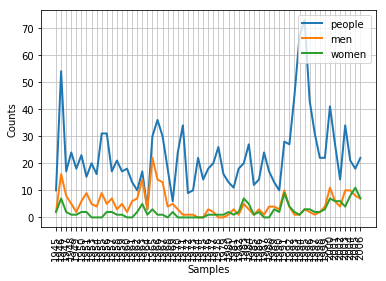

In [24]:
cfd.plot()

In [25]:
cfd.tabulate(conditions=['men', 'women', 'people'], samples=[str(x) for x in range(1945,1967)], cumulative=True)

       1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 
   men    2   18   26   31   33   39   48   48   53   57   66   71   78   81   86   88   94  101  115  118  140  154 
 women    2    9   11   12   13   15   17   17   17   17   17   19   21   22   23   23   23   25   30   31   34   35 
people   10   64   81  105  123  146  161  161  181  197  228  259  276  297  314  332  345  355  372  375  405  441 


In [26]:
cfd.tabulate(conditions=['men', 'women', 'people'], samples=[str(x) for x in range(1967,1989)], cumulative=True)

       1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 
   men   13   17   22   25   26   27   28   28   28   31   33   33   33   34   37   38   43   46   47   50   51   55 
 women    1    1    3    3    3    3    3    3    3    4    5    6    7    9   10   12   19   24   25   27   27   27 
people   30   48   54   78  112  121  131  153  167  185  205  231  247  260  271  289  309  336  348  362  386  403 


In [27]:
cfd.tabulate(conditions=['men', 'women', 'people'], samples=[str(x) for x in range(1989,2007)], cumulative=True)

       1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 
   men    4    7   17   21   22   23   26   28   29   31   35   46   52   56   66   76   84   91 
 women    3    5   14   18   20   21   24   27   29   31   34   41   47   53   57   65   76   83 
people   13   23   51   78  123  190  263  306  337  359  381  422  449  463  497  518  536  558 


In [28]:
print(cfd['men'])
print(cfd['women'])
print(cfd['people'])

<FreqDist with 57 samples and 300 outcomes>
<FreqDist with 47 samples and 145 outcomes>
<FreqDist with 61 samples and 1402 outcomes>


> 8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females

In [29]:
names = nltk.corpus.names
print(names.fileids())

['female.txt', 'male.txt']


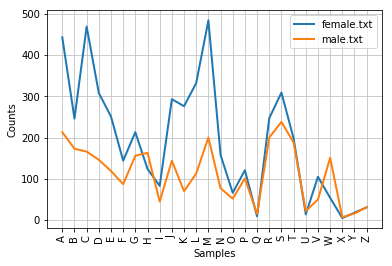

In [30]:
cfd = nltk.ConditionalFreqDist((fileid, name[0])
                               for fileid in names.fileids()
                               for name in names.words(fileid)
                               )
cfd.plot()

>11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [31]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
       (genre, word)
       for genre in brown.categories()
      for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


> 15. Write a program to find all words that occur at least three times in the Brown Corpus.

In [32]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
       (genre, word)
       for genre in brown.categories()
      for word in brown.words(categories=genre )
       )

In [34]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [35]:
occurences = [(x, y) for (x, y) in zip(cfd['adventure'].keys(), cfd['adventure'].values()) if y>3]
print(list(occurences))

[('Dan', 23), ('Morgan', 28), ('told', 46), ('himself', 75), ('he', 761), ('would', 191), ('Ann', 4), ('.', 4057), ('He', 522), ('was', 914), ('well', 28), ('of', 1322), ('her', 444), ('certainly', 4), ("didn't", 70), ('want', 43), ('a', 1354), ('wife', 25), ('who', 91), ('as', 310), ('If', 48), ('had', 591), ('married', 8), (',', 3488), ("he'd", 12), ('have', 133), ('been', 131), ('asking', 4), ('for', 331), ('trouble', 17), ('But', 119), ('all', 167), ('this', 203), ('Sometimes', 6), ('up', 226), ('in', 847), ('the', 3370), ('middle', 5), ('night', 30), ('thinking', 20), ('and', 1622), ('then', 99), ('could', 151), ('not', 179), ('get', 92), ('back', 165), ('to', 1309), ('sleep', 12), ('His', 70), ('around', 71), ('so', 114), ('much', 54), ('long', 72), ('that', 494), ('now', 90), ('felt', 34), ('if', 91), ('nothing', 38), ('The', 410), ('thing', 28), ('be', 183), ('sell', 4), ('out', 266), ('Budd', 4), ('leave', 18), ('country', 16), ('but', 197), ('there', 133), ('streak', 5), ('hi

> 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

> 17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [41]:
from collections import Counter
stopwords = set(nltk.corpus.stopwords.words() + [',', '.', '?', '!', '\'', '\"', ":", '(', ')', ';', '--', '\'\'', '``'])
brown_no_stopwords = [w for w 
                          in nltk.corpus.brown.words() 
                          if w.lower() not in stopwords]
word_counts = [(k,v ) for k, v in Counter(brown_no_stopwords).items()]

sorted_words = sorted(word_counts, key=lambda t: t[1], reverse=False)
sorted_words[-50:]

[('state', 544),
 ('three', 553),
 ('around', 556),
 ('use', 566),
 ('old', 568),
 ('American', 569),
 ('another', 573),
 ('New', 575),
 ('right', 597),
 ('go', 605),
 ('great', 608),
 ('used', 610),
 ('came', 621),
 ('day', 623),
 ('last', 636),
 ('year', 649),
 ('never', 664),
 ('might', 670),
 ('us', 670),
 ('life', 676),
 ('know', 679),
 ('world', 684),
 ('long', 713),
 ('get', 719),
 ('see', 728),
 ('still', 731),
 ('work', 755),
 ('well', 757),
 ('good', 767),
 ('make', 768),
 ('little', 788),
 ('people', 811),
 ('Mr.', 844),
 ('way', 892),
 ('much', 900),
 ('many', 925),
 ('years', 943),
 ('back', 950),
 ('even', 985),
 ('must', 1003),
 ('new', 1060),
 ('made', 1122),
 ('like', 1237),
 ('first', 1242),
 ('may', 1292),
 ('two', 1311),
 ('time', 1556),
 ('could', 1580),
 ('said', 1943),
 ('would', 2677)]

> 18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [42]:
bigrams = nltk.bigrams(nltk.corpus.brown.words())
cfd = nltk.ConditionalFreqDist(bigrams)

In [43]:
cfd_list =  [(bigram, count) 
            for bigram, count 
            in Counter((nltk.bigrams(nltk.corpus.brown.words()))).items() 
            if not (bigram[0].lower() in stopwords or bigram[1].lower() in stopwords)]

sorted_bigrams = list(sorted(cfd_list, key=lambda t: t[1]))

In [44]:
print(sorted_bigrams.reverse())

None


> ★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.


> Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). 



> Work through exercise 2.8.23 on Zipf's law. Zipf's law connects to a property of the Barabasi-Albert networks. Which one? Take a look at this article and write a paragraph or two describing other important instances of power-laws found on the internet.

In [45]:
#calculate the product of the frequency and the rank 
from collections import Counter

stopwords = set(nltk.corpus.stopwords.words() + [',', '.', '?', '!', '\'', '\"', ":", '(', ')', ';', '--', '\'\'', '``'])

brown_no_stopwords = [w for w in nltk.corpus.brown.words() ]

word_counts = [(k,v ) for k, v in Counter(brown_no_stopwords).items()]

In [46]:
#ranks = sorted(word_counts, key=lambda k: (-word_counts[k], word_counts.index(k)))
sorted_words = sorted(word_counts, key=lambda t: t[1], reverse=True)

Text(0,0.5,'log(frequency)')

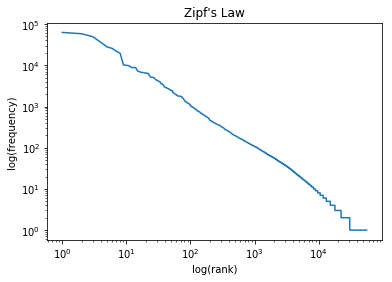

In [47]:
import numpy as np
import matplotlib.pyplot as plt

word_freq = [k for _, k in sorted_words]
word_rank = np.arange(1, len(word_freq)+1, 1)
plt.loglog(word_rank, word_freq)
plt.title("Zipf's Law")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")

In [48]:
word_freq = np.array(word_freq)

In [49]:
word_rank = np.array(word_rank)
word_rank

array([    1,     2,     3, ..., 56055, 56056, 56057])

In [51]:
word_freq*word_rank


array([ 62713, 116668, 148038, ...,  56055,  56056,  56057])

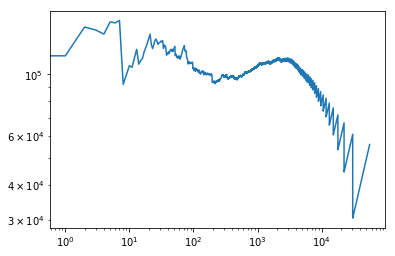

In [58]:
#check if it is constant
plt.loglog(word_freq*word_rank)

In [ ]:
len(word_freq)

> What is going on at the extreme ends of the plotted line?
Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. 
You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. 

>What do you make of Zipf's Law in the light of this?

In [63]:
import random
import string
from nltk.tokenize import word_tokenize
N = 50000

big_string = ''.join(random.choice('abcde ') for _ in range(N))
tokens = word_tokenize(big_string)

In [64]:
tokens

['aadebeceea',
 'ab',
 'debdd',
 'eea',
 'ebaaccbc',
 'd',
 'bea',
 'c',
 'ccbcadcabaacdbcdcadabacead',
 'ecded',
 'ba',
 'abddaaddbeabecaa',
 'adebe',
 'de',
 'dedb',
 'aca',
 'eb',
 'd',
 'a',
 'baabbdccaadcadaecd',
 'ceceeaedcdebab',
 'acacebacbbeeeaaead',
 'deadd',
 'eb',
 'b',
 'dd',
 'cccdddddd',
 'bbae',
 'aacdb',
 'ebbbacb',
 'bbdbbdcc',
 'dbcdbeec',
 'cddda',
 'bbbbceacccdedb',
 'bed',
 'dccbcdd',
 'bacabbbdbebbede',
 'dbadbdcb',
 'decbb',
 'bc',
 'aac',
 'bbdca',
 'ebd',
 'd',
 'ddaadadebedbeeebdceedabcc',
 'dddadecba',
 'e',
 'd',
 'cecacc',
 'a',
 'bdacbbbdaabebda',
 'a',
 'cccc',
 'daedcabebbdbadeaebe',
 'e',
 'a',
 'b',
 'ce',
 'cbd',
 'ccbcd',
 'dddecdc',
 'beeebabe',
 'bbecaec',
 'acc',
 'b',
 'eaababeebed',
 'eb',
 'a',
 'bdcd',
 'bdeaebcceaeeda',
 'cdcedbada',
 'dab',
 'a',
 'eb',
 'ab',
 'e',
 'ddade',
 'addb',
 'eca',
 'dcbcadabe',
 'ddcaab',
 'e',
 'dd',
 'cacbc',
 'bedba',
 'dd',
 'bdaaeadb',
 'adebd',
 'de',
 'eebead',
 'bd',
 'ebeddcdaedbdcbde',
 'cebaec',
 'aee

In [ ]:
plt.loglog(tokens)
plt.title("Zipf's Law")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb5cf37fbf8> (for post_execute):


KeyboardInterrupt: 